In [35]:
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [36]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [37]:
print(f'Lenght of Train Images is : {xtrain.shape}')
print(f'Lenght of Test Images is : {xtest.shape}')
print(f'Length of Train labels is : {ytrain.shape}')
print(f'Lenght of Test labels is : {ytest.shape}')

Lenght of Train Images is : (60000, 28, 28)
Lenght of Test Images is : (10000, 28, 28)
Length of Train labels is : (60000,)
Lenght of Test labels is : (10000,)


In [38]:
print(xtrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [39]:
print(ytrain[0])
print(xtrain[0])
print(np.unique(ytrain))

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

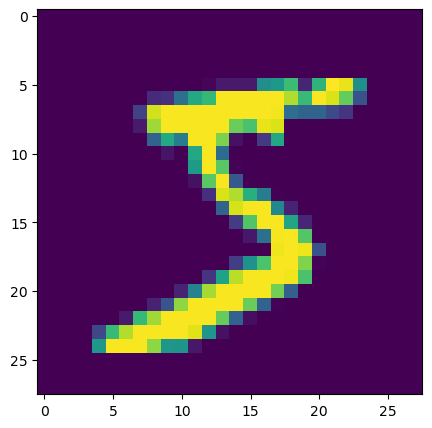

In [40]:
fig, ax = plt.subplots(figsize = (5,5))
plt.imshow(xtrain[0])

In [41]:
print(xtrain.shape)


(60000, 28, 28)


In [44]:
xtrain = xtrain.reshape(-1, 28*28)
xtest = xtest.reshape(-1, 28*28)

In [45]:
xtrain = xtrain/256
xtest = xtest/256

In [46]:
xtrain[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
model = MLPClassifier(solver='adam', activation='relu',hidden_layer_sizes = (64,64))

In [49]:
model.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [50]:
prediction = model.predict(xtest)

In [51]:
print(prediction)

[7 2 1 ... 4 5 6]


In [52]:
acc = confusion_matrix(ytest, prediction)

In [53]:
print(acc)

[[ 970    0    1    1    1    0    3    1    2    1]
 [   0 1125    2    1    0    1    3    1    2    0]
 [   3    1 1007    3    3    0    1    5    8    1]
 [   0    0    4  981    0    3    0    7    4   11]
 [   1    0    1    0  963    1    3    4    2    7]
 [   2    0    0   13    1  864    4    0    6    2]
 [   5    1    1    1    4    7  938    0    1    0]
 [   1    4    8    3    1    0    0 1003    4    4]
 [   3    1    3    6    3    3    3    5  944    3]
 [   3    2    0    8   11    3    1    4    3  974]]


In [56]:
def accuracy(cm):
    diagonal = cm.trace()
    element = cm.sum()
    return diagonal/element

In [57]:
print(accuracy(acc))

0.9769


In [59]:
print(model.predict([xtest[0]]))
print(model.predict([xtest[5]]))

[7]
[1]
